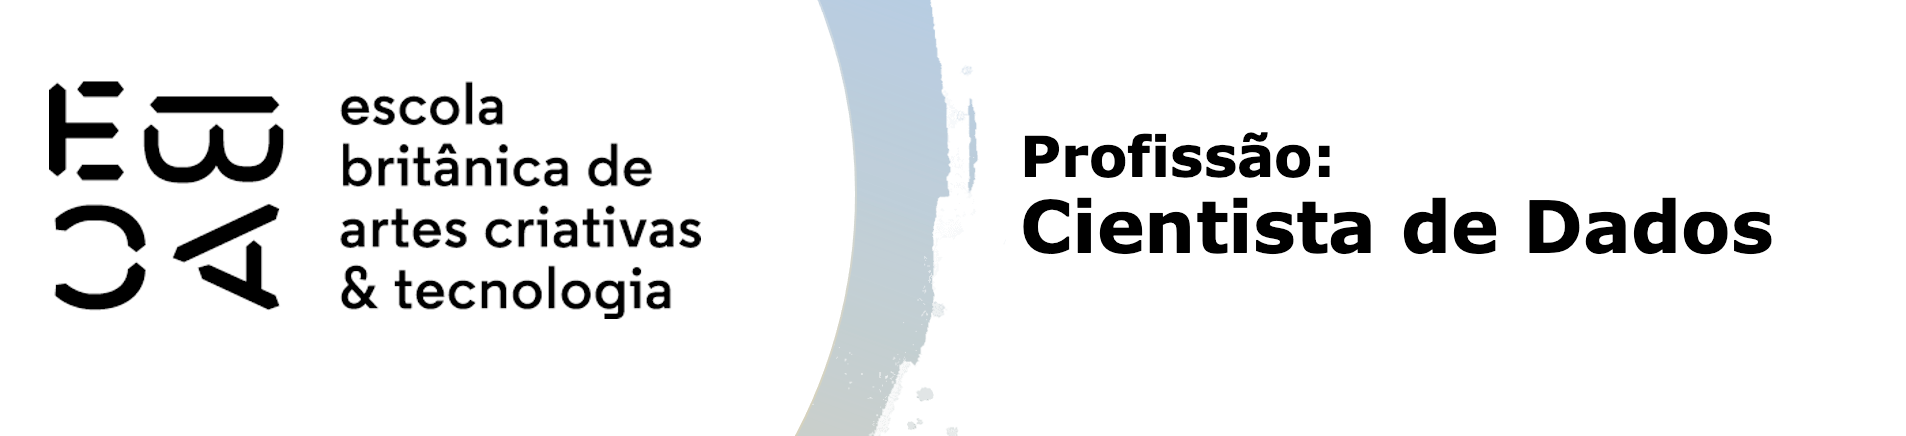

# Tarefa II

Ainda sobre a base da NFP vista na tarefa passada:

|Campo|Descrição|
|:-|:-|
|CNPJ emit.| CNPJ do emitente da nota|
|Emitente| Nome fantasia do emitente da nota|
|No.| Número da nota fiscal|
|Data Emissão| Data de emissão da nota fiscal|
|Valor NF| Valor da nota fiscal|
|Data Registro| Data de registro no sistema da NFP|
|Créditos| Valor dos créditos (doação)|
|Situação do Crédito| Se o crédito já foi pago, está sendo processado etc.|
|Ano| Ano da emissão da nota|
|Semestre| Semestre da emissão da nota|
|Retorno| Valor do crédito dividido pelo valor da nota|
|flag_credito| Indicadora se a nota possui crédito positivo|
|categoria| Categorização da nota |

**OBJETIVO:** Algumas notas não dão retorno, o que pode ocorrer por diversos motivos, um deles seria a ocorrência de produtos não incentivados como cigarros e bebidas alcólicas. O nosso objetivo é tentar prever que tipo de nota tem maior ou menor propensão a fornecer créditos.

**Observação**: Esta é uma base real, havendo características de acordo. Pode haver uma variabilidade difícil de explicar, em parte por causa de uma freqüência de notas inconstante no tempo (por diversos motivos), em parte por haverem informações importantes, protegidas pela LGPD, não constantes na base, que pode interferir no crédito gerado, o que vai ocasionar uma variabilidade difícil de se explicar. *Welcome to the jungle*, A vida real é assim :)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_pickle('base_nfp.pkl')
df.head()

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Mercado
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Auto posto
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,0.016296,1,Restaurantes
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,0.016233,1,Restaurantes
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,0.016240,1,Restaurantes


## Criando variáveis

**Variáveis temporais**: É possível que haja alguma regra de liberação de créditos de acordo com o dia do mês, o dia da semana, fim de semana (sim ou não), ou até alterações temporais da regra. Vamos criar as seguintes variáveis para testar estas hipóteses:

- Dia da semana
- Dummy para fim de semana
- Dia do mês
- Mês (já na base)
- Trimestre
- Ano (já na base)

**Valor da nota**: Vamos criar também algumas variáveis para resumir o valor da nota, e posteriormente criar uma intuição sobre categorizações de variáveis contínuas.

- Crie categorizações da variável ```Valor NF```, por quantís, em 5, 10, 20 e 50 categorias.

In [4]:
# Criando as variáveis relacionadas aos dias da semana
df['dia_semana'] = df['Data Emissão'].dt.day_name()
df['fim_de_semana'] = df['dia_semana'].isin(['Saturday', 'Sunday']).replace({True: 1, False: 0})
df['dia_mes'] = df['Data Emissão'].dt.day
df['trimestre'] = df['Data Emissão'].dt.quarter

#Dividindo o valor das notas em quantis
quantis = [5, 10, 20, 50]
for q in quantis:
    df[f'quantis_{q}'] = pd.qcut(df['Valor NF'], q, labels=False) + 1
df.head()

C:\Users\samsun\AppData\Local\Temp\ipykernel_15812\3732031615.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['fim_de_semana'] = df['dia_semana'].isin(['Saturday', 'Sunday']).replace({True: 1, False: 0})


,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,...,flag_credito,categoria,dia_semana,fim_de_semana,dia_mes,trimestre,quantis_5,quantis_10,quantis_20,quantis_50
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,...,0,Mercado,Friday,0,30,2,2,4,8,18
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,...,0,Auto posto,Friday,0,30,2,3,6,12,29
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,...,1,Restaurantes,Friday,0,30,2,2,4,8,20
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,...,1,Restaurantes,Friday,0,30,2,4,8,16,39
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,...,1,Restaurantes,Friday,0,30,2,4,8,16,40


## Calcule o IV de todas essas variáveis

Sugestão: Construa um metadados e tente utilizar uma função como a que foi utilizada durante a aula. Você vai conseguir fazer esse cálculo para as variáveis uma a uma, mas em casos reais em que vamos mais além na criação de variáveis, podemos ter centenas, ou até milhares de variáveis, esses cálculos *precisam* ser automáticos nesses casos.

In [5]:
# Aqui usamos a função para calculo do IV mostrada em aula
def IV(variavel, resposta):
    tab = pd.crosstab(variavel, resposta, margins=True, margins_name='total')

    rótulo_evento = tab.columns[0]
    rótulo_nao_evento = tab.columns[1]

    tab['pct_evento'] = tab[rótulo_evento]/tab.loc['total',rótulo_evento]
    tab['pct_nao_evento'] = tab[rótulo_nao_evento]/tab.loc['total',rótulo_nao_evento]
    tab['woe'] = np.log(tab.pct_evento/tab.pct_nao_evento)
    tab['iv_parcial'] = (tab.pct_evento - tab.pct_nao_evento)*tab.woe
    return tab['iv_parcial'].sum()

In [6]:
df['retorno_positivo'] = df['Retorno'] >0

In [7]:
# Criando uma tabela auxiliar para o calculo do IV e WOE
metadados = pd.DataFrame({'dtype':df.dtypes})
metadados['papel'] = 'covariavel'
metadados.loc['retorno_positivo','papel'] = 'resposta'
metadados['nunique'] = df.nunique()
metadados

,dtype,papel,nunique
CNPJ emit.,object,covariavel,19606
Emitente,object,covariavel,15575
No.,int64,covariavel,124400
Data Emissão,datetime64[ns],covariavel,1815
Valor NF,float64,covariavel,33658
Data Registro,datetime64[ns],covariavel,1817
Créditos,float64,covariavel,9717
Situação do Crédito,category,covariavel,3
Ano,int64,covariavel,5
Semestre,int64,covariavel,2


In [8]:
# Aqui iremos calcular o IV, sendo que iremos agrupar asa variaveis com mais de 5 valores diferentes
for var in metadados.index:

    if (metadados.loc[var, 'nunique'] > 5) and (df[var].dtype in [np.float64, np.int64, np.int32]):
        
        df[var] = pd.to_numeric(df[var], errors='coerce')
        df = df.dropna(subset=[var])
        
        # Aplica qcut e calcula IV
        try:
            metadados.loc[var, 'IV'] = IV(pd.qcut(df[var], 5, duplicates='drop'), df['retorno_positivo'])
        except Exception as e:
            print(f'Erro ao calcular IV para {var}: {e}')
            metadados.loc[var, 'IV'] = np.nan
    else:
        # Caso contrário, calcula IV diretamente
        try:
            metadados.loc[var, 'IV'] = IV(df[var], df['retorno_positivo'])
        except Exception as e:
            print(f'Erro ao calcular IV para {var}: {e}')
            metadados.loc[var, 'IV'] = np.nan
metadados

c:\Users\samsun\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\samsun\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\samsun\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\samsun\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\samsun\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr

,dtype,papel,nunique,IV
CNPJ emit.,object,covariavel,19606,inf
Emitente,object,covariavel,15575,inf
No.,int64,covariavel,124400,0.032394
Data Emissão,datetime64[ns],covariavel,1815,inf
Valor NF,float64,covariavel,33658,0.056695
Data Registro,datetime64[ns],covariavel,1817,inf
Créditos,float64,covariavel,9717,inf
Situação do Crédito,category,covariavel,3,inf
Ano,int64,covariavel,5,0.041651
Semestre,int64,covariavel,2,0.001258


## Conclua

- Quais variáveis parecem apresentar maior poder de discriminação segundo o IV?
- Quando categorizamos variáveis contínuas parece haver alguma relação entre o número de categorias e o IV?

A variável com o maior poder de discriminação, segundo o IV é a variável **'Categoria'**, além disso, as variáveis <font color = red>'quantis_5', 'quantis_50' e 'Valor NF'</font>, também são variáveis bastante úteis, por outro lado, não para haver nenhuma relação entre o número d categorias nas variáveis categorizadas e o IV.

## Descritiva simples no tempo

Para compor a análise que virá a seguir, faça uma análise descritiva básica no tempo - utilize trimestre como agregação (ou uma média móvel por trimestre, como preferir) e avalie graficamente:

- A quantidade de notas registradas na base por período
- A quantidade de notas por categoria e por período
- A proporção de notas com crédito por categoria por período

C:\Users\samsun\AppData\Local\Temp\ipykernel_15812\214256424.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='trimestre', y='quantidade', data=quantidade_por_trimestre, palette='viridis')


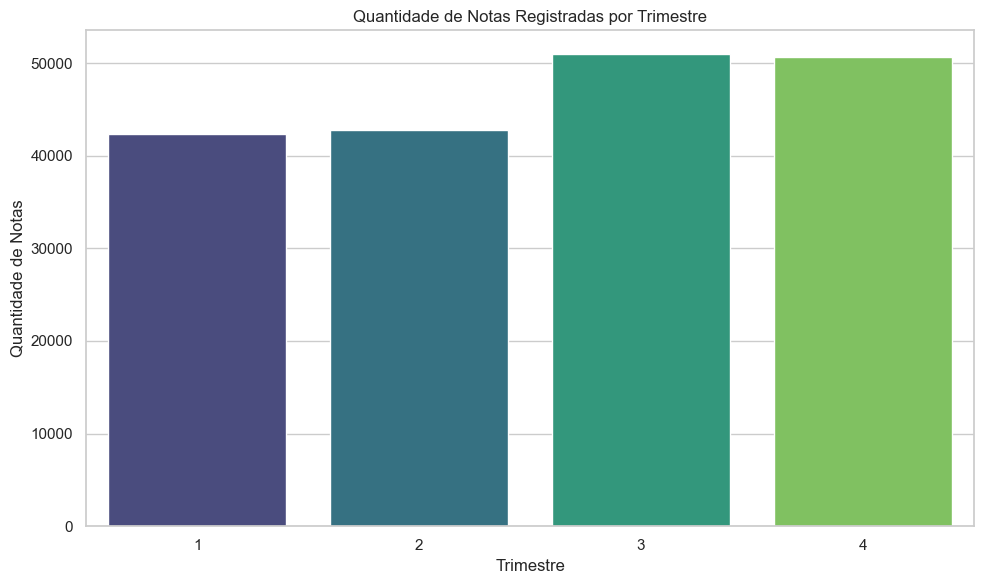

In [9]:
# Primeiramente iremos plotar os retornos por trimestre
quantidade_por_trimestre = df.groupby('trimestre').size().reset_index(name='quantidade')

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='trimestre', y='quantidade', data=quantidade_por_trimestre, palette='viridis')

plt.xlabel('Trimestre')
plt.ylabel('Quantidade de Notas')
plt.title('Quantidade de Notas Registradas por Trimestre')

plt.tight_layout()
plt.show()

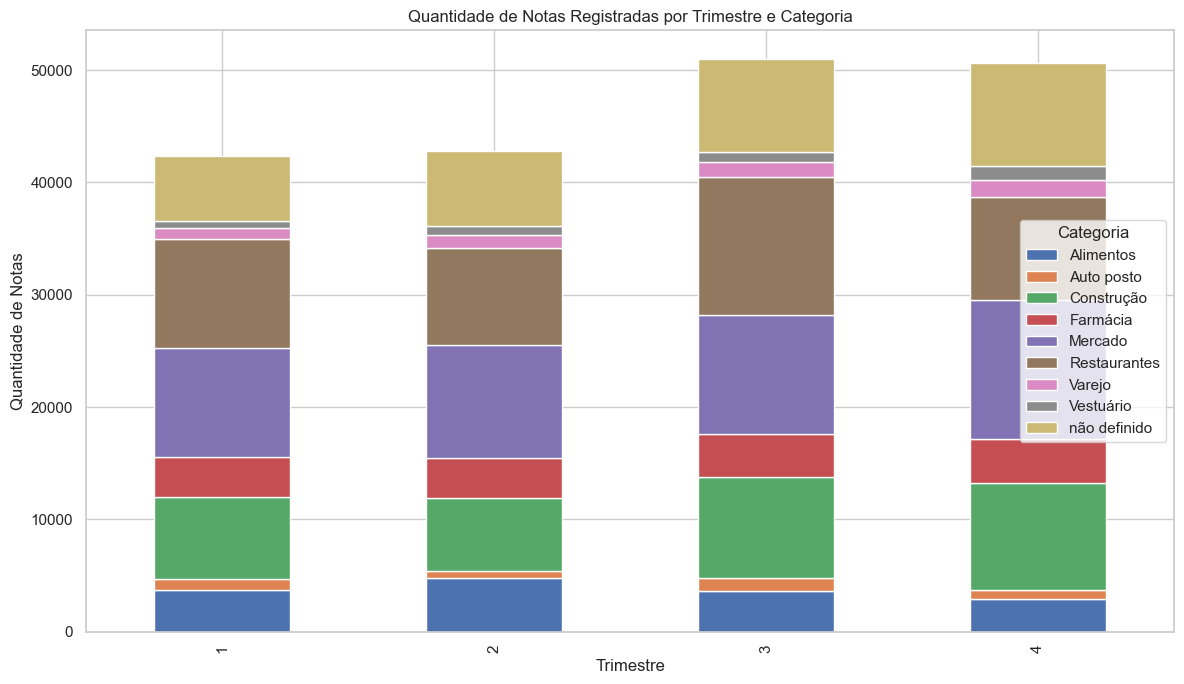

In [10]:
# Aqui iremos plotar por trimestre e por categoria do estabelecimento
quantidade_por_trimestre_cat = df.groupby(['trimestre', 'categoria']).size().reset_index(name='quantidade')

pivot_df = quantidade_por_trimestre_cat.pivot(index='trimestre', columns='categoria', values='quantidade').fillna(0)
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 7))

plt.xlabel('Trimestre')
plt.ylabel('Quantidade de Notas')
plt.title('Quantidade de Notas Registradas por Trimestre e Categoria')
plt.legend(title='Categoria')

plt.tight_layout()
plt.show()

In [11]:
# Agora, para plotar o gráfico da proporção de retornos positivos por trimestre e categoria, precisamos criar variaveis adicionais
# Primeiramente iremos agrupar todas as variáveis que queremos plotar 
quantidade_trimestre_retorno = df.groupby(['trimestre', 'categoria', 'retorno_positivo']).size().reset_index(name='quantidade')
quantidade_trimestre_retorno

,trimestre,categoria,retorno_positivo,quantidade
0,1,Alimentos,False,458
1,1,Alimentos,True,3228
2,1,Auto posto,False,986
3,1,Auto posto,True,54
4,1,Construção,False,4385
...,...,...,...,...
67,4,Varejo,True,320
68,4,Vestuário,False,617
69,4,Vestuário,True,583
70,4,não definido,False,4972


In [40]:
# Agora iremos fazer agrupamentos de modo a calcular o total de notas por trimestre e categoria e o total de notas positivas
total_por_trimestre_categoria = quantidade_trimestre_retorno.groupby(['trimestre', 'categoria'])['quantidade'].sum().reset_index(name='total')
positivos_por_trimestre_categoria = quantidade_trimestre_retorno[quantidade_trimestre_retorno['retorno_positivo'] == 1]
positivos_por_trimestre_categoria = positivos_por_trimestre_categoria.groupby(['trimestre', 'categoria'])['quantidade'].sum().reset_index(name='positivos')

# Por fim, iremos juntar estes valores em um dataframe, que será usado para construir o gráfico
proporcao_df = pd.merge(total_por_trimestre_categoria, positivos_por_trimestre_categoria, on=['trimestre', 'categoria'], how='left').fillna(0)
proporcao_df['proporcao_positivos'] = proporcao_df['positivos'] / proporcao_df['total']
proporcao_df.head()

,trimestre,categoria,total,positivos,proporcao_positivos
0,1,Alimentos,3686,3228,0.875746
1,1,Auto posto,1040,54,0.051923
2,1,Construção,7294,2909,0.398821
3,1,Farmácia,3523,928,0.263412
4,1,Mercado,9728,4314,0.443462


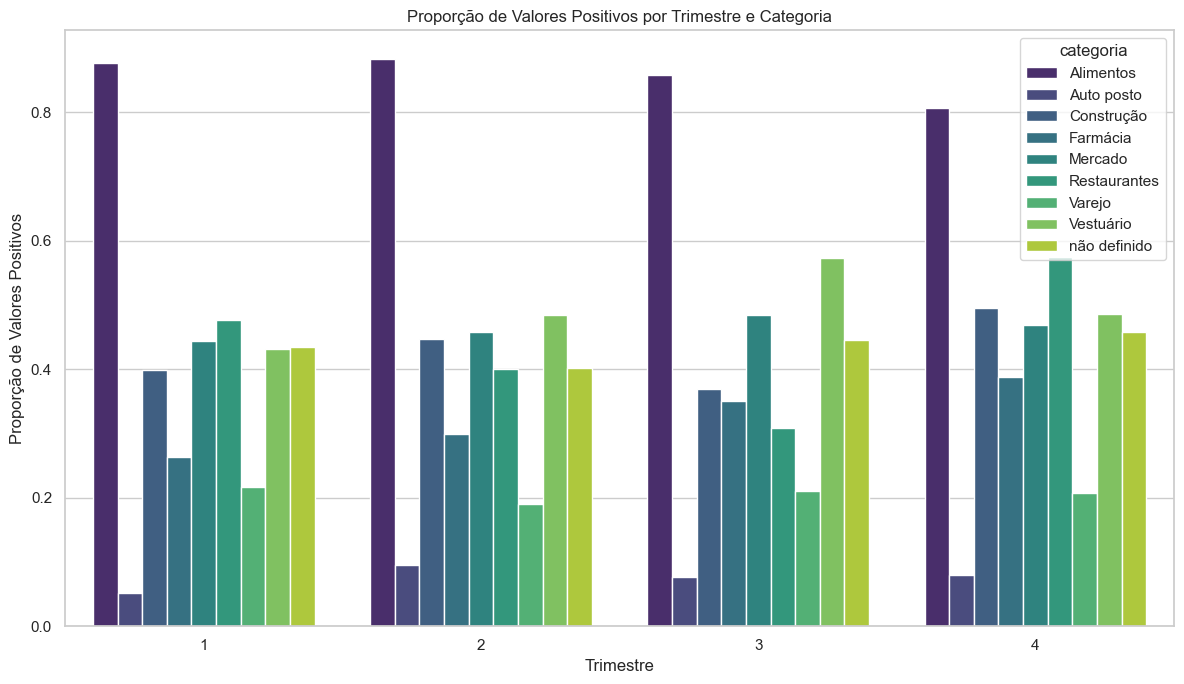

In [13]:
sns.set(style="whitegrid")

# Criar o gráfico de barras
plt.figure(figsize=(12, 7))
sns.barplot(x='trimestre', y='proporcao_positivos', hue='categoria', data=proporcao_df, palette='viridis')

# Adicionar rótulos e título
plt.xlabel('Trimestre')
plt.ylabel('Proporção de Valores Positivos')
plt.title('Proporção de Valores Positivos por Trimestre e Categoria')

# Exibir o gráfico
plt.tight_layout()
plt.show()

## Avalie o WOE e o IV no tempo

Avalie o WOE e o IV no tempo da variável ```categoria```.

In [41]:
# Aqui iremos calcular o WOE e IV da variavel categoria, de maneira similar à feita nas ultimas aulas
tab = pd.crosstab(df['categoria'],df['retorno_positivo'] , margins=True, margins_name='total')
tab['pct_nao_evento'] = tab[0] / tab.loc['total', 0]
tab['pct_evento'] = tab[1] / tab.loc['total', 1]
tab['RC'] = tab['pct_evento']/ tab['pct_nao_evento']
tab['WOE'] = np.log(tab['pct_evento']/tab['pct_nao_evento'])
tab['IV'] = (tab.pct_evento - tab.pct_nao_evento)*tab.WOE

tab

retorno_positivo,False,True,total,pct_nao_evento,pct_evento,RC,WOE,IV
categoria,,,,,,,,
Alimentos,2091,12868,14959,0.020494,0.152036,7.418413,2.003965,0.263604
Auto posto,3418,271,3689,0.033501,0.003202,0.095577,-2.347828,0.071136
Construção,18419,13811,32230,0.180529,0.163177,0.903885,-0.101053,0.001753
Farmácia,10054,4886,14940,0.098542,0.057728,0.585826,-0.534733,0.021824
Mercado,22878,19808,42686,0.224233,0.234032,1.043702,0.042774,0.000419
Restaurantes,22630,17118,39748,0.221802,0.202250,0.911848,-0.092282,0.001804
Varejo,3984,1035,5019,0.039048,0.012229,0.313166,-1.161021,0.031138
Vestuário,1807,1799,3606,0.017711,0.021255,1.200126,0.182427,0.000647
não definido,16747,13042,29789,0.164141,0.154092,0.938774,-0.063180,0.000635


In [42]:
# Por fim, iremos classificar o IV com base nos intervalos
def cat_iv(iv):
    if iv < 0.02:
        return 'inútil'
    elif iv < 0.1:
        return 'fraca'
    elif iv < 0.3:
        return 'média'
    elif iv < 0.5:
        return 'forte'
    else:
        return 'suspeitamente forte'    
    
tab['faixa_iv'] = tab['IV'].apply(lambda iv: cat_iv(iv))
tab

retorno_positivo,False,True,total,pct_nao_evento,pct_evento,RC,WOE,IV,faixa_iv
categoria,,,,,,,,,
Alimentos,2091,12868,14959,0.020494,0.152036,7.418413,2.003965,0.263604,média
Auto posto,3418,271,3689,0.033501,0.003202,0.095577,-2.347828,0.071136,fraca
Construção,18419,13811,32230,0.180529,0.163177,0.903885,-0.101053,0.001753,inútil
Farmácia,10054,4886,14940,0.098542,0.057728,0.585826,-0.534733,0.021824,fraca
Mercado,22878,19808,42686,0.224233,0.234032,1.043702,0.042774,0.000419,inútil
Restaurantes,22630,17118,39748,0.221802,0.202250,0.911848,-0.092282,0.001804,inútil
Varejo,3984,1035,5019,0.039048,0.012229,0.313166,-1.161021,0.031138,fraca
Vestuário,1807,1799,3606,0.017711,0.021255,1.200126,0.182427,0.000647,inútil
não definido,16747,13042,29789,0.164141,0.154092,0.938774,-0.063180,0.000635,inútil


## Conclua

- Quais categorias parece ter maior proporção de notas com retornos maiores que zero?
- Essas diferenças são estáveis no tempo?

Dicas:<br>
- Considere que a quantidade de notas vem aumentando
- Considere que há períodos bem atípicos no histórico
- Considere que a partir de janeiro de 2020 o público é mais parecido com o público atual (2022), seja por pandemia, seja por crescimento do público, e considere os dados dessa data em diante na sua conclusão.

Ao Analisar tanto os gráficos quanto as tabela com os valores de IV e WOE, vemos que as categorias com maior proporção de retornos positivos são os de  <font color = 'red'>Alimentos, Auto Posto, Farmácia e Varejo</font>, sendo que esta proporção permanece constante para a categoria de Alimentos, já para as outras categorias, essas proporções são bastante instáveis, mudando notavelmente durante os trimestres.